In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)  #sets nice background color
import scipy

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 1.Import and understand the data. [5 Marks]

### A.Import ‘signal-data.csv’ as DataFrame. [2 Marks]

In [2]:
signal = pd.read_csv('signal-data.csv')

#Imported the dataset

In [3]:
signal.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
signal.info()

#Checking number of features and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
signal.shape

#592 columns and 1567 rows

(1567, 592)

### B.Print 5 point summary and share at least 2 observations. [3 Marks]

In [6]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [7]:
signal.describe()

#Describe function shows a 5 point summary of the entire dataset

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### Insights : Many variables have steep steps indicating a heavily skewed distribution. Few column values seem to be completely repeated in all rows due to which the min, max mean etc all are the same. These columns can be redundant. Columns like 4 has a great difference between 75% and max value which indicated a high jump, steep increase in data. We can also see different count values for different columns, few have very less values, which means that there are lots of missing data in few columns.

### 2.Data cleansing: [15 Marks]

#### A.Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]

In [8]:
signal = signal.drop(['Time'], axis = 1)

#Time stamp doesn't seem to add value to the dataset

In [9]:

for col in signal.columns:
    col_per_missing = signal[col].isnull().sum() * 100 / len(signal[col])
    if col_per_missing > 0.20:
        print('Greater than 20%. Column number :', col)
        signal.drop([col], axis = 1, inplace=True)
    elif col_per_missing == 0:
        continue 
    else:
        print('Lesser than 20%. Column number :', col)
        signal[col] = signal[col].fillna(signal[col].mean())


Greater than 20%. Column number : 0
Greater than 20%. Column number : 1
Greater than 20%. Column number : 2
Greater than 20%. Column number : 3
Greater than 20%. Column number : 4
Greater than 20%. Column number : 5
Greater than 20%. Column number : 6
Greater than 20%. Column number : 7
Lesser than 20%. Column number : 8
Lesser than 20%. Column number : 9
Lesser than 20%. Column number : 10
Lesser than 20%. Column number : 11
Lesser than 20%. Column number : 12
Lesser than 20%. Column number : 13
Lesser than 20%. Column number : 14
Lesser than 20%. Column number : 15
Lesser than 20%. Column number : 16
Lesser than 20%. Column number : 17
Lesser than 20%. Column number : 18
Greater than 20%. Column number : 19
Lesser than 20%. Column number : 21
Lesser than 20%. Column number : 22
Lesser than 20%. Column number : 23
Lesser than 20%. Column number : 24
Lesser than 20%. Column number : 25
Lesser than 20%. Column number : 26
Lesser than 20%. Column number : 27
Lesser than 20%. Column numbe

Lesser than 20%. Column number : 283
Lesser than 20%. Column number : 284
Lesser than 20%. Column number : 285
Lesser than 20%. Column number : 286
Lesser than 20%. Column number : 287
Lesser than 20%. Column number : 288
Lesser than 20%. Column number : 289
Greater than 20%. Column number : 290
Greater than 20%. Column number : 292
Greater than 20%. Column number : 293
Lesser than 20%. Column number : 294
Lesser than 20%. Column number : 295
Lesser than 20%. Column number : 296
Lesser than 20%. Column number : 297
Lesser than 20%. Column number : 298
Lesser than 20%. Column number : 299
Lesser than 20%. Column number : 300
Lesser than 20%. Column number : 301
Lesser than 20%. Column number : 302
Lesser than 20%. Column number : 303
Lesser than 20%. Column number : 304
Lesser than 20%. Column number : 305
Lesser than 20%. Column number : 306
Lesser than 20%. Column number : 307
Lesser than 20%. Column number : 308
Lesser than 20%. Column number : 309
Lesser than 20%. Column number : 31

In [10]:
signal.shape

# We have dropped all the columns with null values greater than 20% and imputed the mean of columns for the rest

(1567, 253)

In [11]:
#To check for remaining NaN values

pd.DataFrame( signal.isnull().sum(), columns= ['Number of missing values'])


,Number of missing values
8,0
9,0
10,0
11,0
12,0
...,...
586,0
587,0
588,0
589,0


In [12]:
# This shows that now we have 253 columns and none of those have any NanN values

In [13]:
signal.head()

,8,9,10,11,12,13,14,15,16,17,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


#### B.Identify and drop the features which are having same value for all the rows. [3 Marks]

In [14]:
nunique = signal.nunique()
cols_to_drop = nunique[nunique == 1].index

print(cols_to_drop)

signal = signal.drop(cols_to_drop, axis=1)


#Dropping all columns with only one unique value in all rows of the dataframe, which shows that the data is repeated

Index(['13', '42', '49', '52', '149', '179', '186', '189', '284', '315', '322',
       '325', '422', '451', '458', '461'],
      dtype='object')


In [15]:
signal.head()

,8,9,10,11,12,14,15,16,17,18,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [16]:
signal.shape

#Now, number of features have become 237

(1567, 237)

#### C.Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]

In [17]:
signal

,8,9,10,11,12,14,15,16,17,18,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.500500,0.016200,-0.003400,0.945500,202.439600,7.955800,414.871000,10.043300,0.968000,192.396300,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,1.496600,-0.000500,-0.014800,0.962700,200.547000,10.154800,414.734700,9.259900,0.970100,191.287200,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,1.443600,0.004100,0.001300,0.961500,202.017900,9.515700,416.707500,9.314400,0.967400,192.703500,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,1.488200,-0.012400,-0.003300,0.962900,201.848200,9.605200,422.289400,9.692400,0.968700,192.155700,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,1.503100,-0.003100,-0.007200,0.956900,201.942400,10.566100,420.592500,10.338700,0.973500,191.603700,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1.342400,-0.004500,-0.005700,0.957900,203.986700,11.769200,419.340400,10.239700,0.969300,193.747000,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,1.433300,-0.006100,-0.009300,0.961800,204.017300,9.162000,405.817800,10.228500,0.969600,193.788900,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,1.462862,-0.000841,0.000146,0.964353,199.956809,9.005371,413.086035,9.907603,0.971444,190.047354,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,1.462200,-0.007200,0.003200,0.969400,197.244800,9.735400,401.915300,9.863000,0.974000,187.381800,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


### In the given dataset, we have various signals as features. The above dataset doesn't efficiently provide insight on the practical usage of each of these signals and if one is more important than the other. For example, for the mpg dataset, if a feature was car color, that wouldn't have affected mpg of the car in anyway, so it makes sense to drop it. But, in this case, not much detail is given on what these signals represent and convey. So, we cannot drop signals based on functional knowledge

### D.Check for multi-collinearity in the data and take necessary action. [3 Marks]

In [18]:
cor_matrix = signal.corr().abs()
print(cor_matrix)

#this is teh correlation matrix which shows the relation

                  8         9        10        11        12        14  \
8          1.000000  0.152133  0.058386  0.065065  0.005457  0.085784   
9          0.152133  1.000000  0.064065  0.008692  0.065125  0.004359   
10         0.058386  0.064065  1.000000  0.021358  0.052534  0.077850   
11         0.065065  0.008692  0.021358  1.000000  0.212828  0.064007   
12         0.005457  0.065125  0.052534  0.212828  1.000000  0.012805   
...             ...       ...       ...       ...       ...       ...   
586        0.010433  0.033738  0.000327  0.023005  0.037056  0.063512   
587        0.022845  0.059301  0.046965  0.014900  0.012258  0.044234   
588        0.026250  0.060758  0.046048  0.009667  0.012759  0.036585   
589        0.022770  0.004880  0.008393  0.015281  0.036720  0.068161   
Pass/Fail  0.028016  0.031191  0.033639  0.032620  0.005969  0.068975   

                 15        16        17        18  ...       577       582  \
8          0.065719  0.039571  0.014963  0.02

In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

#taking only upper traingular matrix

            8         9        10        11        12        14        15  \
8         NaN  0.152133  0.058386  0.065065  0.005457  0.085784  0.065719   
9         NaN       NaN  0.064065  0.008692  0.065125  0.004359  0.050226   
10        NaN       NaN       NaN  0.021358  0.052534  0.077850  0.004057   
11        NaN       NaN       NaN       NaN  0.212828  0.064007  0.003347   
12        NaN       NaN       NaN       NaN       NaN  0.012805  0.033933   
...        ..       ...       ...       ...       ...       ...       ...   
586       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
587       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
588       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
589       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Pass/Fail NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                 16        17        18  ...       577       582       583 

In [20]:
to_drop = [column for column in upper_tri.columns if any((upper_tri[column] > 0.95) & (upper_tri[column] != 1) & (upper_tri[column] != -1))]
print(); print(to_drop)

#these are the columns to drop based on high correlation between variables


['27', '36', '148', '152', '165', '174', '249', '252', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '359', '360', '361', '365', '366', '376', '377', '386', '387', '388', '389', '390', '392', '393', '417', '420', '421', '424', '425', '426', '427', '429', '435', '436', '437', '440', '441', '442', '443', '444', '445', '446', '447', '448', '452', '453', '454', '455', '456', '457', '459', '490', '493', '494', '495', '520', '522', '523', '524', '526', '527', '545', '561', '574', '575', '576', '577', '584', '585', '588']


In [21]:
signal = signal.drop(to_drop, axis=1)

#dropping those variables

In [22]:
signal.head()

,8,9,10,11,12,14,15,16,17,18,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,...,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066,-1
1,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,...,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500,-1
2,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,...,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,...,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200,-1
4,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,...,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200,-1


In [23]:
signal.shape

#Now dropped shape is 132 columns

(1567, 132)

#### E.Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

In [24]:
## Checking for unexpected values

pd.DataFrame(signal.eq('.').sum(), columns= ['Number of missing observations'])


# No other unexpected value is present.So, no other modifications needed for the data

,Number of missing observations
8,0
9,0
10,0
11,0
12,0
...,...
583,0
586,0
587,0
589,0


### Based on logical reasoning, I have already eliminated the time column, understanding that the time stamp of signals being shown isn't an important contributing factor to whether the signal will be a pass or fail for the entire set up

### 3.Data analysis & visualisation: [5 Marks]

#### A.Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]

In [25]:
signal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
8,1567.0,1.462862,0.073849,1.1910,1.41125,1.4616,1.51685,1.6564
9,1567.0,-0.000841,0.015107,-0.0534,-0.01080,-0.0013,0.00840,0.0749
10,1567.0,0.000146,0.009296,-0.0349,-0.00560,0.0004,0.00590,0.0530
11,1567.0,0.964353,0.012444,0.6554,0.95810,0.9658,0.97130,0.9848
12,1567.0,199.956809,3.255195,182.0940,198.13095,199.5371,202.00675,272.0451
...,...,...,...,...,...,...,...,...
583,1567.0,0.015318,0.017174,0.0060,0.01160,0.0138,0.01650,0.4766
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.02760,0.1028
587,1567.0,0.016475,0.008805,0.0032,0.01060,0.0148,0.02030,0.0799
589,1567.0,99.670066,93.861936,0.0000,44.36860,72.0230,114.74970,737.3048


In [26]:
signal

,8,9,10,11,12,14,15,16,17,18,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,1.500500,0.016200,-0.003400,0.945500,202.439600,7.955800,414.871000,10.043300,0.968000,192.396300,...,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066,-1
1,1.496600,-0.000500,-0.014800,0.962700,200.547000,10.154800,414.734700,9.259900,0.970100,191.287200,...,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500,-1
2,1.443600,0.004100,0.001300,0.961500,202.017900,9.515700,416.707500,9.314400,0.967400,192.703500,...,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,1.488200,-0.012400,-0.003300,0.962900,201.848200,9.605200,422.289400,9.692400,0.968700,192.155700,...,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200,-1
4,1.503100,-0.003100,-0.007200,0.956900,201.942400,10.566100,420.592500,10.338700,0.973500,191.603700,...,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1.342400,-0.004500,-0.005700,0.957900,203.986700,11.769200,419.340400,10.239700,0.969300,193.747000,...,536.3418,2.0153,7.98,0.2363,0.4988,0.0143,0.006800,0.013800,203.172000,-1
1563,1.433300,-0.006100,-0.009300,0.961800,204.017300,9.162000,405.817800,10.228500,0.969600,193.788900,...,537.9264,2.1814,5.48,0.3891,0.4975,0.0131,0.006800,0.013800,203.172000,-1
1564,1.462862,-0.000841,0.000146,0.964353,199.956809,9.005371,413.086035,9.907603,0.971444,190.047354,...,530.3709,2.3435,6.49,0.4154,0.4987,0.0153,0.019700,0.008600,43.523100,-1
1565,1.462200,-0.007200,0.003200,0.969400,197.244800,9.735400,401.915300,9.863000,0.974000,187.381800,...,534.3936,1.9098,9.13,0.3669,0.5004,0.0178,0.026200,0.024500,93.494100,-1


<AxesSubplot:xlabel='10', ylabel='Density'>

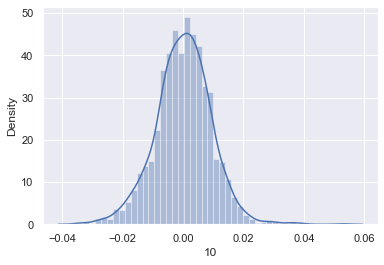

In [27]:
sns.distplot(signal['10'])

#We noice that this feature seems to have a normal distribution with a longer tail on the right which denotes outliers

<AxesSubplot:xlabel='18', ylabel='Density'>

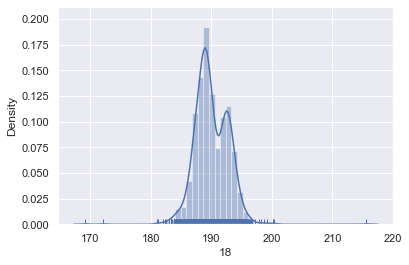

In [28]:
sns.distplot(signal['18'], rug = 'True')


#This feature seems to be bimodal with one peak at around 190 and other closer to 200.

<AxesSubplot:xlabel='571'>

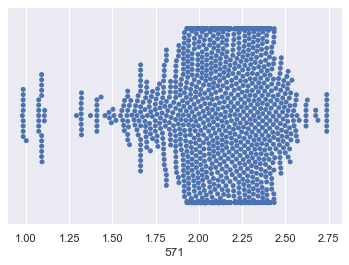

In [29]:
sns.swarmplot(x=signal['571'])

#this plot seems to have many outliers in the lower set of values with lots of data huddled around the mean

<AxesSubplot:xlabel='571', ylabel='Density'>

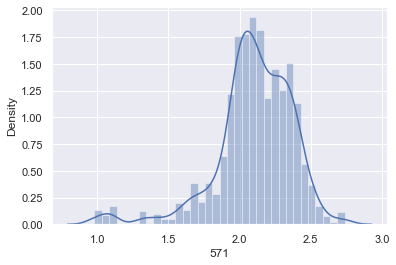

In [30]:
sns.distplot(signal['571'])

#It has outliers in the beginning as seen in the above graph 

<AxesSubplot:xlabel='589', ylabel='Density'>

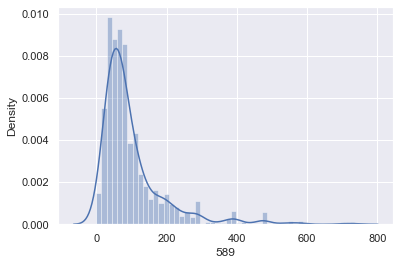

In [31]:
sns.distplot(signal['589'])


#Colum has high outlier on the right end. This column is also skewed

<AxesSubplot:ylabel='589'>

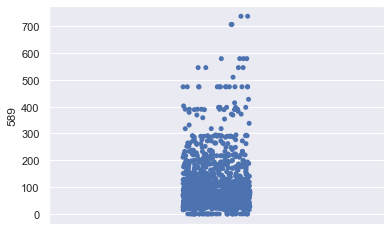

In [32]:
sns.stripplot(y=signal['589'])

#There seems to be a lot of data points around initial datas of the set and there seems to be lots of outliers on the higher end

#### B.Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]

<AxesSubplot:xlabel='8', ylabel='589'>

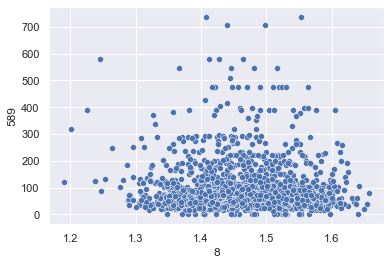

In [33]:
sns.scatterplot(x='8', y ='589', data=signal)

In [34]:
# There seems to be no correlation between the two variables

<AxesSubplot:xlabel='10', ylabel='589'>

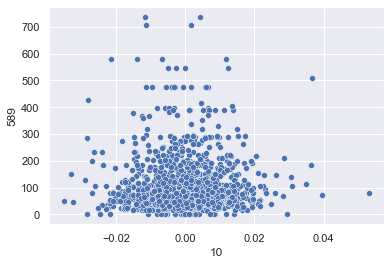

In [35]:
sns.scatterplot(x='10', y ='589', data=signal)

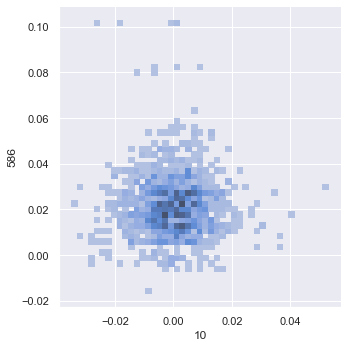

In [36]:
sns.displot(signal, x="10", y="586")

#Both the features don't seem to have any corelation

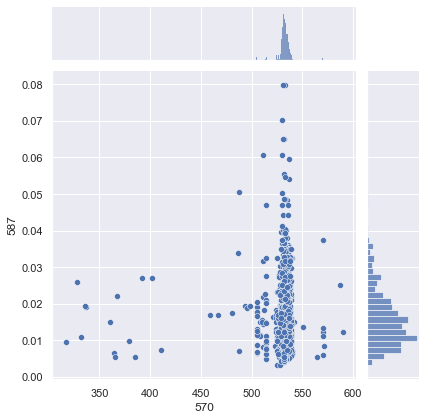

In [37]:
sns.jointplot(data=signal, x="570", y="587")

#There doesn't seem to be a positive or negative correlation

### 4.Data pre-processing: [10 Marks]

#### A.Segregate predictors vs target attributes. [2 Marks]

In [38]:
X= signal.drop(labels='Pass/Fail', axis=1)
y = signal[['Pass/Fail']]
X.head()

#Keeping only Pass/fail column in target

,8,9,10,11,12,14,15,16,17,18,...,560,570,571,572,573,582,583,586,587,589
0,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,...,0.1039,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066
1,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,...,0.0375,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500
2,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,...,0.1233,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200
3,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,...,0.2710,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200
4,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,...,0.0461,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200


In [39]:
y.head()

,Pass/Fail
0,-1
1,-1
2,1
3,-1
4,-1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#splitting the data into train and test

#### B.Check for target balancing and fix it if found imbalanced. [3 Marks]

<AxesSubplot:xlabel='count', ylabel='Pass/Fail'>

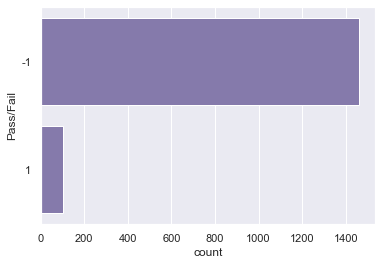

In [41]:
sns.countplot(y="Pass/Fail", data=signal, color="m")

#### This is an imbalanced data set. A balancing technique like sampling technique has to be used to balance the data.

In [42]:
# Let's try and upsample the data to match the pass and fail using SMOTE

from imblearn.over_sampling import SMOTE

print('Before UpSampling : ',y_train.value_counts())

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print()
print('After UpSampling : ',y_train_res.value_counts())

print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

#Using SMOTE, I have upsampled the data

Before UpSampling :  Pass/Fail
-1           1168
 1             85
dtype: int64

After UpSampling :  Pass/Fail
-1           1168
 1           1168
dtype: int64
After UpSampling, the shape of train_X: (2336, 131)
After UpSampling, the shape of train_y: (2336, 1) 



#### C.Perform train-test split and standardise the data or vice versa if required. [3 Marks]

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res) 

#Not fitting, only transforming the test: conversion just transforms, using the same params that it learned from the train data.

X_test_scaled = scaler.transform(X_test)

#### D.Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

In [44]:
signal.describe()

,8,9,10,11,12,14,15,16,17,18,...,570,571,572,573,582,583,586,587,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,1.462862,-0.000841,0.000146,0.964353,199.956809,9.005371,413.086035,9.907603,0.971444,190.047354,...,530.523623,2.101836,28.450165,0.345636,0.500096,0.015318,0.021458,0.016475,99.670066,-0.867262
std,0.073849,0.015107,0.009296,0.012444,3.255195,2.793916,17.204591,2.401563,0.012051,2.778376,...,17.499736,0.275112,86.304681,0.248478,0.003403,0.017174,0.012354,0.008805,93.861936,0.498010
min,1.191000,-0.053400,-0.034900,0.655400,182.094000,2.249300,333.448600,4.469600,0.579400,169.177400,...,317.196400,0.980200,3.540000,0.066700,0.477800,0.006000,-0.016900,0.003200,0.000000,-1.000000
25%,1.411250,-0.010800,-0.005600,0.958100,198.130950,7.096750,406.131000,9.568550,0.968250,188.300650,...,530.702700,1.982900,7.500000,0.242250,0.497900,0.011600,0.013450,0.010600,44.368600,-1.000000
50%,1.461600,-0.001300,0.000400,0.965800,199.537100,8.973900,412.262900,9.852000,0.972500,189.675700,...,532.398200,2.118600,8.650000,0.293400,0.500200,0.013800,0.020500,0.014800,72.023000,-1.000000
75%,1.516850,0.008400,0.005900,0.971300,202.006750,10.858700,419.082800,10.127750,0.976800,192.178900,...,534.356400,2.290650,10.130000,0.366900,0.502350,0.016500,0.027600,0.020300,114.749700,-1.000000
max,1.656400,0.074900,0.053000,0.984800,272.045100,19.546500,824.927100,102.867700,0.984800,215.597700,...,589.508200,2.739500,454.560000,2.196700,0.509800,0.476600,0.102800,0.079900,737.304800,1.000000


In [104]:
X_train_res.describe()

,8,9,10,11,12,14,15,16,17,18,...,560,570,571,572,573,582,583,586,587,589
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,...,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,1.465673,-0.001722,0.000401,0.963760,200.020300,8.776071,413.536464,9.940597,0.971252,190.078458,...,0.076767,530.735541,2.091689,22.554356,0.323094,0.500255,0.015359,0.021791,0.017153,98.794298
std,0.064761,0.013660,0.008645,0.008899,2.873420,2.531040,14.236712,1.978244,0.006382,2.495876,...,0.047507,15.441440,0.287371,68.919700,0.193608,0.003365,0.014394,0.011385,0.008187,82.357556
min,1.200500,-0.053400,-0.034900,0.877500,182.094000,2.293500,389.467100,5.570900,0.908300,169.177400,...,0.017700,317.196400,0.980200,3.540000,0.066700,0.477800,0.006500,-0.016900,0.003200,0.000000
25%,1.423364,-0.010224,-0.004999,0.957606,198.460296,6.957363,407.999931,9.628969,0.967676,188.539775,...,0.040708,530.798848,1.981200,7.540000,0.232789,0.498100,0.011600,0.014500,0.011300,49.400164
50%,1.463836,-0.001600,0.000864,0.964700,199.778157,8.734550,413.021850,9.901795,0.971800,189.883678,...,0.064600,532.383361,2.134500,8.709772,0.290319,0.500381,0.013820,0.021578,0.015900,74.616885
75%,1.510321,0.005946,0.005912,0.969874,201.784525,10.514490,418.357800,10.141875,0.975900,191.865177,...,0.098043,534.305583,2.290900,10.070000,0.357900,0.502500,0.016720,0.027900,0.021094,118.449875
max,1.656400,0.074900,0.053000,0.984100,272.045100,19.546500,824.927100,102.867700,0.984800,215.597700,...,0.445700,589.508200,2.739500,454.560000,2.196700,0.509800,0.476600,0.102800,0.079900,737.304800


In [105]:
y_train_res.describe()

,Pass/Fail
count,2336.000000
mean,0.000000
std,1.000214
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


#### The train, test and the original data seem to have similar statistical characteristics as seen using the describe function. The count is different due to upsampling where each count is 2336 as shown above

### 5.Model training, testing and tuning: [20 Marks]

#### A.Use any Supervised Learning technique to train a model. [2 Marks]

In [47]:
from sklearn import svm

clf = svm.SVC(gamma=0.1, C=1)      
clf.fit(X_train_res_scaled , y_train_res.values.ravel())

#fitting SVM model

SVC(C=1, gamma=0.1)

In [48]:
y_pred = clf.predict(X_test_scaled)

#predicting on scaled test data

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

accuracy_test = accuracy_score(y_test, y_pred)
print('Test Accuracy of SVM model is :', accuracy_test)

Test Accuracy of SVM model is : 0.9394904458598726


In [50]:
print('Train Accuracy of SVM model is :', accuracy_score(y_train_res, clf.predict(X_train_res_scaled)))


Train Accuracy of SVM model is : 1.0


#### B.Use cross validation techniques. [3 Marks]

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


num_folds = 10

kfold = KFold(n_splits=num_folds)
model = svm.SVC(gamma=0.1, C=1)
results = cross_val_score(model, X_train_res_scaled, y_train_res, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.123% (6.264%)


#### C.Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]

In [52]:
from sklearn.model_selection import RandomizedSearchCV
 
# defining parameter range
param_dist = {
    "C": [1, 10],
    "gamma": [0.05, 0.5]
}

samples = 20  # number of random samples 
randomCV = RandomizedSearchCV(svm.SVC(), param_distributions=param_dist, n_iter=samples) 

randomCV.fit(X_train_res_scaled, y_train_res)


RandomizedSearchCV(estimator=SVC(), n_iter=20,
                   param_distributions={'C': [1, 10], 'gamma': [0.05, 0.5]})

In [53]:
print(randomCV.best_score_)

0.9931495818005454


In [54]:
print(randomCV.best_params_)

#these are the best parameters which give best accuracy

{'gamma': 0.05, 'C': 10}


In [55]:
y_pred_hyper = randomCV.predict(X_test_scaled)

In [56]:
accuracy_test_hyper = accuracy_score(y_test, y_pred_hyper)
print('Test Accuracy of SVM model is :', accuracy_test_hyper)

Test Accuracy of SVM model is : 0.9394904458598726


#### D.Use any other technique/method which can enhance the model performance. [4 Marks]

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit(X_train_res_scaled)

PCA(n_components=100)

In [58]:
print(pca.explained_variance_)

#Variance explained by each eigen value

[10.11352461  6.08255572  4.55068306  4.1978108   3.69611121  3.50517523
  3.4764729   3.1725362   2.91259058  2.84971974  2.74562859  2.45769345
  2.40610169  2.35514608  2.24923204  2.11698049  2.06500312  1.98796411
  1.90644598  1.86718211  1.79317274  1.71252525  1.64448426  1.63445917
  1.60476961  1.53648027  1.52017993  1.49796186  1.44761552  1.43050333
  1.42057519  1.38110557  1.35853626  1.32717827  1.30642182  1.23827849
  1.18463355  1.16510459  1.13067003  1.10600661  1.07479863  1.04623833
  1.02464367  1.01059092  0.98860976  0.95067048  0.93532063  0.92936452
  0.8903664   0.87083489  0.84922462  0.83761723  0.81300704  0.79709347
  0.76063227  0.73692293  0.73345401  0.71174587  0.69582499  0.68226691
  0.66848113  0.64879674  0.63238841  0.60914344  0.60139746  0.58829778
  0.57641481  0.56951253  0.54650557  0.5425232   0.53830395  0.51717188
  0.50474205  0.49566001  0.4759061   0.46162817  0.45754572  0.4511548
  0.42815359  0.41845256  0.39527913  0.37988637  0.

In [59]:
print(pca.components_)

[[ 0.0323391  -0.04558308  0.01510241 ... -0.01278834  0.05561235
   0.03609306]
 [ 0.00862681  0.02879827 -0.00742783 ...  0.05199125 -0.03011928
  -0.05673114]
 [-0.00310985 -0.02895377  0.03922783 ...  0.074459   -0.01038195
  -0.06226805]
 ...
 [-0.05958921 -0.03494236  0.04353133 ...  0.35474532 -0.32717793
   0.36970799]
 [ 0.01829784 -0.020538    0.08593703 ... -0.07494901  0.03151035
  -0.08485226]
 [-0.04113126 -0.0313328  -0.018001   ... -0.06932022  0.04683047
  -0.06418997]]


In [60]:
print(pca.explained_variance_ratio_)

[0.07716943 0.04641185 0.03472317 0.03203064 0.02820251 0.02674561
 0.0265266  0.02420747 0.022224   0.02174427 0.02095002 0.01875299
 0.01835933 0.01797052 0.01716236 0.01615324 0.01575663 0.0151688
 0.01454679 0.0142472  0.01368248 0.01306712 0.01254794 0.01247145
 0.01224491 0.01172384 0.01159946 0.01142993 0.01104577 0.0109152
 0.01083944 0.01053828 0.01036607 0.01012679 0.00996842 0.00944846
 0.00903913 0.00889012 0.00862737 0.00843918 0.00820106 0.00798313
 0.00781836 0.00771113 0.00754341 0.00725392 0.0071368  0.00709135
 0.00679378 0.00664475 0.00647986 0.00639129 0.0062035  0.00608208
 0.00580387 0.00562296 0.00559649 0.00543085 0.00530937 0.00520591
 0.00510072 0.00495053 0.00482533 0.00464796 0.00458886 0.0044889
 0.00439823 0.00434556 0.00417001 0.00413963 0.00410743 0.00394619
 0.00385134 0.00378204 0.00363132 0.00352237 0.00349122 0.00344246
 0.00326695 0.00319293 0.00301611 0.00289865 0.00279295 0.00271081
 0.00262902 0.00259185 0.00254214 0.00247414 0.00239754 0.0022574

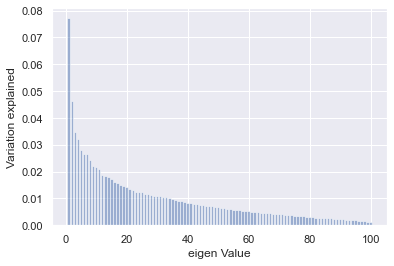

In [61]:
plt.bar(list(range(1,101)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

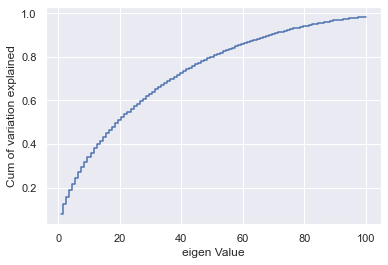

In [62]:
plt.step(list(range(1,101)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

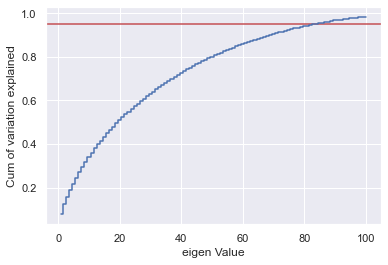

In [63]:
plt.axhline(y = 0.95, color = 'r', linestyle = '-')
plt.step(list(range(1,101)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### This shows that just over 80 components are enough to explain 95% of variance. These number of components should be enough to train the models

In [64]:
Xpca100 = pca.transform(X_train_res_scaled)

In [65]:
Xpca100

array([[ 1.84508035e-01, -1.77292530e+00,  5.10189161e-01, ...,
        -1.32923984e-02,  7.91271397e-02, -5.93206132e-01],
       [ 1.13485285e+00, -5.43147613e+00,  1.03690989e+00, ...,
         9.78199801e-01,  6.88125281e-01, -4.67877239e-01],
       [-5.11414322e-01,  2.28236061e+00,  1.14321695e+00, ...,
        -1.41873925e-01,  8.74932379e-01,  4.11794651e-01],
       ...,
       [-4.09348115e-02, -3.40005840e+00, -9.70632310e-01, ...,
         1.96452407e-01,  6.12199352e-02,  1.33596273e-01],
       [-1.50930271e-01,  3.64945385e-01, -3.02641749e-01, ...,
         1.70544792e-01, -7.62997154e-02,  2.33819919e-01],
       [ 1.99784486e+01,  3.10163363e+00,  7.11482158e-01, ...,
         2.13278799e-01,  4.14108926e-01, -2.96326862e-01]])

In [66]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca100, y_train_res, test_size=0.20, random_state=1)

#Splitting into train and test using the pca dataframe

In [67]:
clf_pca = svm.SVC(gamma=0.01, C=3)      
clf_pca.fit(X_train_pca, y_train_pca)

SVC(C=3, gamma=0.01)

In [68]:
y_pred_pca = clf_pca.predict(X_test_pca)

In [69]:
print('Train Accuracy of SVM model is :', accuracy_score(y_train_pca, clf_pca.predict(X_train_pca)))

accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print('Test Accuracy of SVM model is :', accuracy_pca)

Train Accuracy of SVM model is : 1.0
Test Accuracy of SVM model is : 0.9914529914529915


#### The train and test accuracy are really good with no dataleak or any fall inaccuracy, or any overfitting. 

#### E.Display and explain the classification report in detail. [3 Marks]

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       247
           1       0.98      1.00      0.99       221

    accuracy                           0.99       468
   macro avg       0.99      0.99      0.99       468
weighted avg       0.99      0.99      0.99       468



#### F.Apply the above steps for all possible models that you have learnt so far. [5 Marks]

### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors= 1 , weights = 'distance' )
knn.fit(X_train_res_scaled , y_train_res.values.ravel())

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [72]:
predicted_labels_knn = knn.predict(X_test_scaled) # predicts the value on trained model

score_knn = accuracy_score(y_test, predicted_labels_knn)  
print('Accuracy Score of KNN model is', score_knn)

Accuracy Score of KNN model is 0.6178343949044586


Train accuracy is:
 [1.         1.         0.82577055 0.85445205 0.74614726 0.76969178
 0.69349315 0.71361301 0.6682363  0.68535959 0.64126712 0.66053082
 0.63184932 0.64854452 0.61986301 0.63099315 0.60830479 0.61515411
 0.59760274 0.60530822 0.58861301 0.59674658 0.58133562 0.58775685
 0.57705479]
Test accuracy is:
 [0.61783439 0.6656051  0.47133758 0.52547771 0.4044586  0.45859873
 0.37898089 0.42356688 0.33757962 0.36305732 0.30254777 0.32484076
 0.28025478 0.29299363 0.27070064 0.27707006 0.2611465  0.27070064
 0.2388535  0.25796178 0.23248408 0.23566879 0.21974522 0.22611465
 0.21019108]


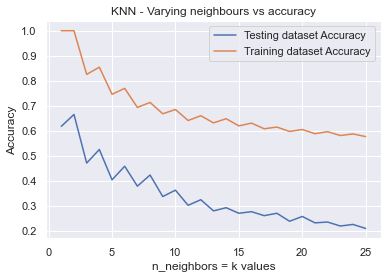

In [73]:
k_range = range(1, 26)
train_accuracy_f = np.empty(len(k_range))
test_accuracy_f = np.empty(len(k_range))


for i, k in enumerate(k_range):
    knn_f = KNeighborsClassifier(n_neighbors=k)
    knn_f.fit(X_train_res_scaled,  y_train_res.values.ravel())
     
    # Compute training and test data accuracy
    train_accuracy_f[i] = knn_f.score(X_train_res_scaled,  y_train_res.values.ravel())
    test_accuracy_f[i] = knn_f.score(X_test_scaled, y_test)

print('Train accuracy is:\n',train_accuracy_f)
print('Test accuracy is:\n',test_accuracy_f)
plt.plot(k_range, test_accuracy_f, label = 'Testing dataset Accuracy')
plt.plot(k_range, train_accuracy_f, label = 'Training dataset Accuracy')

#Displaying train and test accuracy for corresponding k values from 1-26
 
plt.legend()
plt.xlabel('n_neighbors = k values')
plt.ylabel('Accuracy')
plt.title('KNN - Varying neighbours vs accuracy')
plt.show()

### Using CV

In [74]:
num_folds = 10

kfold = KFold(n_splits=num_folds)
results_knn = cross_val_score(knn, X_train_res_scaled, y_train_res, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results_knn.mean()*100.0, results_knn.std()*100.0))

# SD is very high which means the data is very spread out around the mean

Accuracy: 77.051% (20.532%)


### RandomCV KNN

In [75]:
k_range = list(range(1, 26))

weight_options = ['uniform', 'distance']

param_dist = dict(n_neighbors=k_range, weights=weight_options)


In [76]:
rand_knn = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

# fit
rand_knn.fit(X_train_res_scaled , y_train_res.values.ravel())

# scores
# examine the best model
print('The best score for KNN model using RandomSearchCV is :',rand_knn.best_score_)
print(rand_knn.best_params_)
print(rand_knn.best_estimator_)

The best score for KNN model using RandomSearchCV is : 0.8249257180587651
{'weights': 'uniform', 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2)


### PCA KNN

In [77]:
Xpca_knn = pca.transform(X_train_res_scaled)

In [78]:
Xpca_knn

array([[ 1.84508035e-01, -1.77292530e+00,  5.10189161e-01, ...,
        -1.32923984e-02,  7.91271397e-02, -5.93206132e-01],
       [ 1.13485285e+00, -5.43147613e+00,  1.03690989e+00, ...,
         9.78199801e-01,  6.88125281e-01, -4.67877239e-01],
       [-5.11414322e-01,  2.28236061e+00,  1.14321695e+00, ...,
        -1.41873925e-01,  8.74932379e-01,  4.11794651e-01],
       ...,
       [-4.09348115e-02, -3.40005840e+00, -9.70632310e-01, ...,
         1.96452407e-01,  6.12199352e-02,  1.33596273e-01],
       [-1.50930271e-01,  3.64945385e-01, -3.02641749e-01, ...,
         1.70544792e-01, -7.62997154e-02,  2.33819919e-01],
       [ 1.99784486e+01,  3.10163363e+00,  7.11482158e-01, ...,
         2.13278799e-01,  4.14108926e-01, -2.96326862e-01]])

In [79]:
# Splitting into train and test for knn model

X_train_pca_knn, X_test_pca_knn, y_train_pca_knn, y_test_pca_knn = train_test_split(Xpca_knn, y_train_res, test_size=0.20, random_state=1)

In [80]:
# Using number of neighbours as 2 and weights as uniform and fitting the model

knn_pca = KNeighborsClassifier(n_neighbors= 2 , weights = 'uniform' )
knn_pca.fit(X_train_pca_knn , y_train_pca_knn.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [81]:
predicted_labels_knn_pca = knn_pca.predict(X_test_pca_knn) # predicts the value on trained model

score_knn_pca = accuracy_score(y_test_pca_knn, predicted_labels_knn_pca)  #displays accuracy of the model when k = 10
print('Accuracy Score of KNN model is after applying pca is :', score_knn_pca)

Accuracy Score of KNN model is after applying pca is : 0.8012820512820513


In [82]:
print('Train Accuracy of KNN model is :', accuracy_score(y_train_pca_knn, knn_pca.predict(X_train_pca_knn)))


Train Accuracy of KNN model is : 1.0


In [83]:
# The train accuracy is very high and test accuracy is low, the KNN model doesn't seem to be performing well.

### Logistic Regressionn

In [84]:
from sklearn.linear_model import LogisticRegression

model_d = LogisticRegression(solver="liblinear")
model_d.fit(X_train_res_scaled , y_train_res.values.ravel())

#Using logistics regressionn to predict outcome of pass or fail

LogisticRegression(solver='liblinear')

In [85]:
y_predict_log = model_d.predict(X_test_scaled)

coef_df = pd.DataFrame(model_d.coef_)
# Coef_contains the coeff of prediction for each target

coef_df['Intercept'] = model_d.intercept_
print(coef_df)

          0         1         2         3         4       5         6  \
0 -0.060668 -0.220588 -0.021832 -0.282409  0.322571 -0.6268  0.406851   

          7         8         9  ...       122      123       124       125  \
0  0.695571  0.381678 -0.176146  ... -0.135228 -0.04378  0.131845 -0.488247   

      126       127       128       129       130  Intercept  
0  0.3769 -0.055374 -0.137324  0.425008 -0.291191  -0.658782  

[1 rows x 132 columns]


In [86]:
model_score = accuracy_score(y_test, y_predict_log)
print('Accuracy prediction for Logistic Regression model :', model_score)


Accuracy prediction for Logistic Regression model : 0.7929936305732485


In [87]:
print('Train Accuracy of logistic model is :', accuracy_score(y_train_res, model_d.predict(X_train_res_scaled)))


Train Accuracy of logistic model is : 0.8818493150684932


### Using CV

In [88]:
num_folds = 10

kfold = KFold(n_splits=num_folds)
results_log = cross_val_score(model_d, X_train_res_scaled, y_train_res, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results_log.mean()*100.0, results_log.std()*100.0))

# SD isn't very high which means the data is not very spread out

Accuracy: 82.543% (5.588%)


### RandomCV Logistic

In [89]:
#Defining the parameters for the logistic regression

space = dict()
space['solver'] = ['lbfgs', 'liblinear', 'newton-cg', 'saga']


In [90]:
random_log = RandomizedSearchCV(model_d, space, scoring='accuracy', n_iter=10, random_state=5)

#Using 10 iterations to search for the best parameters using random searchcv

In [91]:
random_log.fit(X_train_res_scaled , y_train_res.values.ravel())

# scores
# examine the best model
print('The best score for KNN model using RandomSearchCV is :',random_log.best_score_)
print(random_log.best_params_)
print(random_log.best_estimator_)

The best score for KNN model using RandomSearchCV is : 0.850183019454968
{'solver': 'lbfgs'}
LogisticRegression()


### PCA Logistic

In [92]:
Xpca_log = pca.transform(X_train_res_scaled)

In [93]:
Xpca_log

array([[ 1.84508035e-01, -1.77292530e+00,  5.10189161e-01, ...,
        -1.32923984e-02,  7.91271397e-02, -5.93206132e-01],
       [ 1.13485285e+00, -5.43147613e+00,  1.03690989e+00, ...,
         9.78199801e-01,  6.88125281e-01, -4.67877239e-01],
       [-5.11414322e-01,  2.28236061e+00,  1.14321695e+00, ...,
        -1.41873925e-01,  8.74932379e-01,  4.11794651e-01],
       ...,
       [-4.09348115e-02, -3.40005840e+00, -9.70632310e-01, ...,
         1.96452407e-01,  6.12199352e-02,  1.33596273e-01],
       [-1.50930271e-01,  3.64945385e-01, -3.02641749e-01, ...,
         1.70544792e-01, -7.62997154e-02,  2.33819919e-01],
       [ 1.99784486e+01,  3.10163363e+00,  7.11482158e-01, ...,
         2.13278799e-01,  4.14108926e-01, -2.96326862e-01]])

In [94]:
X_train_pca_log, X_test_pca_log, y_train_pca_log, y_test_pca_log = train_test_split(Xpca_log, y_train_res, test_size=0.20, random_state=1)

In [107]:
model_d_pca = LogisticRegression(solver="lbfgs")
model_d_pca.fit(X_train_pca_log , y_train_pca_log.values.ravel())

LogisticRegression()

In [108]:
predicted_labels_log_pca = model_d_pca.predict(X_test_pca_log) # predicts the value on trained model

score_log_pca = accuracy_score(y_test_pca_log, predicted_labels_log_pca)  #displays accuracy of the model when k = 10
print('Test Accuracy Score of Logistic Regression model is after applying pca is :', score_log_pca)

Test Accuracy Score of Logistic Regression model is after applying pca is : 0.8055555555555556


In [109]:
print('Train Accuracy of logistic model is :', accuracy_score(y_train_pca_log, model_d_pca.predict(X_train_pca_log)))


Train Accuracy of logistic model is : 0.8458244111349036


### 6.Post Training and Conclusion: [5 Marks]

### A.Display and compare all the models designed with their train and test accuracies. [1 Marks]

In [98]:
print('Train Accuracy of logistic model is :', accuracy_score(y_train_pca_log, model_d_pca.predict(X_train_pca_log)))
print('Test Accuracy Score of Logistic Regression model is after applying pca is :', score_log_pca)

Train Accuracy of logistic model is : 0.8458244111349036
Test Accuracy Score of Logistic Regression model is after applying pca is : 0.8055555555555556


In [99]:
print('Train Accuracy of KNN model is :', accuracy_score(y_train_pca_knn, knn_pca.predict(X_train_pca_knn)))
print('Test Accuracy Score of KNN model is after applying pca is :', score_knn_pca)

Train Accuracy of KNN model is : 1.0
Test Accuracy Score of KNN model is after applying pca is : 0.8012820512820513


In [100]:
print('Train Accuracy of SVM model is :', accuracy_score(y_train_pca, clf_pca.predict(X_train_pca)))

accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print('Test Accuracy of SVM model is :', accuracy_pca)

Train Accuracy of SVM model is : 1.0
Test Accuracy of SVM model is : 0.9914529914529915


### The train accuracy and test accuracy is the best for SVM model

### B.Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]

#### SVM model seems to have the best train and test accuracy after performing all the hyper-parameter tuning, narrowing down parameters using PCA. Whereas KNN and Logistic Regression seems to have lesser accuracy. KNN model is performing the worst in terms of the test data. For this kind of data, KNN model doesn't seem to be the best fit.

### C.Pickle the selected model for future use. [2 Marks]

In [101]:
import pickle

In [102]:
filename = 'finalized_model_signaldata.sav'
pickle.dump(model, open(filename, 'wb'))

### D.Write your conclusion on the results. [1 Marks]

#### This data had lots of features. Feature selection was key in understanding the part of the data which is more important than the other. I have used various techniques to remove null values, balance the data and so on,  to clean and prepare the data. On using various models to predict the outcome, evidently SVM seems to work the best. I have exported the model in savformat for future use as well.